## Flower Species Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,Conv2D
from tensorflow.keras.models import Sequential
import os
import cv2
from PIL import Image
import sys

C:\Users\hamza\AppData\Roaming\Python\Python39\site-packages\mpl_toolkits\mplot3d\__init__.py:1: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes3d import Axes3D


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
os.listdir()

['.ipynb_checkpoints',
 'daisy',
 'daisy_reshaped',
 'dandelion',
 'dandelion_reshaped',
 'Flower_Classification_1.ipynb',
 'rose',
 'rose_reshaped',
 'sunflower',
 'sunflower_reshaped',
 'tulip',
 'tulip_reshaped']

In [3]:
dandelion=os.listdir('dandelion_reshaped')
sunflower=os.listdir('sunflower_reshaped')
tulip=os.listdir('tulip_reshaped')
rose=os.listdir('rose_reshaped')
daisy=os.listdir('daisy_reshaped')

In [4]:
species=['dandelion','sunflower','tulip','rose','daisy']

In [5]:
# to store each species of the flower in seperate array named after the species (no need to execute this)
print(type(dandelion[0]))
count=0


dadneliondata=[]
for file in dandelion:
    temp=cv2.imread("dandelion_reshaped/"+str(file),1)
    dadneliondata.append(temp)
print(len(dadneliondata))
sunflowerdata=[]
for file in sunflower:
    temp1=cv2.imread("sunflower_reshaped/"+str(file),1)
    sunflowerdata.append(temp1)
print(len(sunflowerdata))
tulipdata=[]
for file in tulip:
    temp=cv2.imread("tulip_reshaped/"+str(file),1)
    tulipdata.append(temp)
print(len(tulipdata))
rosedata=[]
for file in rose:
    temp=cv2.imread("rose_reshaped/"+str(file),1)
    rosedata.append(temp)
print(len(rosedata))
daisydata=[]
for file in daisy:
    temp=cv2.imread("daisy_reshaped/"+str(file),1)
    daisydata.append(temp)
print(len(daisydata))


<class 'str'>
1055
734
984
784
769


In [6]:
print(type(dandelion[0]))
count=0
X=[]
for file in dandelion:
    temp=cv2.imread("dandelion_reshaped/"+str(file),1)
    X.append(temp)
print(len(X))
for file in sunflower:
    temp1=cv2.imread("sunflower_reshaped/"+str(file),1)
    X.append(temp1)
print(len(X))
for file in tulip:
    temp=cv2.imread("tulip_reshaped/"+str(file),1)
    X.append(temp)
print(len(X))
for file in rose:
    temp=cv2.imread("rose_reshaped/"+str(file),1)
    X.append(temp)
print(len(X))
for file in daisy:
    temp=cv2.imread("daisy_reshaped/"+str(file),1)
    X.append(temp)
print(len(X))


<class 'str'>
1055
1789
2773
3557
4326


In [7]:
#xonvert list to numpy array
X=np.array(X)
print(X.shape)

(4326,)


<ipython-input-7-46dc7252941c>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X=np.array(X)


In [8]:
#create output list Y 
Y=[]
for i in range(0,1055):
    Y.append(0)
for i in range(1055,1789):
    Y.append(1)
for i in range(1789,2773):
    Y.append(2)
for i in range(2773,3557):
    Y.append(3)
for i in range(3557,4326):
    Y.append(4)

In [9]:
Y=np.array(Y)
Y.shape

(4326,)

In [11]:
#just to convert individual list into np array (no need to execute this)
dadneliondata=np.array(dadneliondata)
sunflowerdata=np.array(sunflowerdata)
tulipdata=np.array(tulipdata)
rosedata=np.array(rosedata)
daisydata=np.array(daisydata)


print(dadneliondata.shape)
print(sunflowerdata.shape)
print(tulipdata.shape)
print(rosedata.shape)
print(daisydata.shape)

(1055,)
(734,)
(984,)
(784,)
(769,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [13]:
X_train=np.array(X_train)
X_test=np.array(X_test)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
#To find number of classes
k=np.unique(Y_train)
print(k)
K=len(k)
print(K)

(3460,)
(3460,)
(866,)
(866,)
[0 1 2 3 4]
5


In [38]:
X_train=X_train/255.0

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [32]:
X_test=X_test/255.0

Text(0.5, 1.0, 'sunflower')

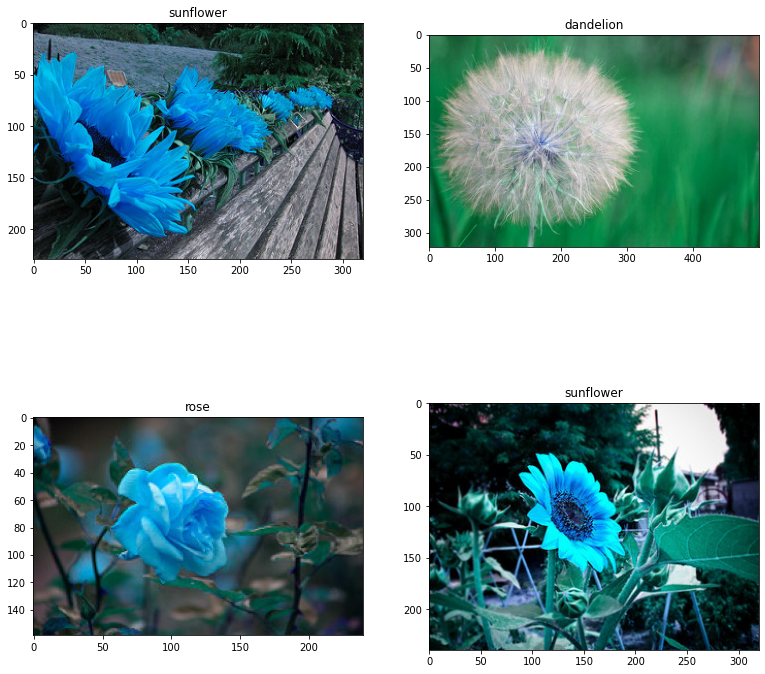

In [33]:
f,ax = plt.subplots(2,2,figsize=(13,13))
ax[0,0].imshow(X_train[0])
ax[0,0].set_title(str(species[(Y_train[0])]))
ax[0,1].imshow(X_train[50])
ax[0,1].set_title(str(species[(Y_train[50])]))
ax[1,0].imshow(X_train[100])
ax[1,0].set_title(str(species[(Y_train[100])]))
ax[1,1].imshow(X_train[106])
ax[1,1].set_title(str(species[(Y_train[106])]))

In [34]:
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow import keras
from tensorflow.keras.layers import Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [35]:
batch_size=128
epochs=25

from tensorflow.keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

### Data Augmentation

In [36]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, -10 to 10)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [37]:
datagen.fit(X_train)

ValueError: setting an array element with a sequence.

### Build a model

In [39]:
i=Input(shape=X_train[0].shape)
X=Conv2D(32,(3,3),strides=(1,1),activation='relu')(i)
X=MaxPooling2D(pool_size=(2,2))(X)
X=Conv2D(64,(3,3),strides=(1,1),activation='relu')(X)
X=MaxPooling2D(pool_size=(2,2))(X)
X=Conv2D(96,(3,3),strides=(1,1),activation='relu')(X)
X=MaxPooling2D(pool_size=(2,2))(X)
X=Conv2D(96,(3,3),strides=(1,1),activation='relu')(X)
X=MaxPooling2D(pool_size=(2,2))(X)
X=Flatten()(X)
X=Dense(512,activation='relu')(X)
#X=Dropout(0.2)(X)
X=Dense(3,activation='softmax')(X)
#X=Dropout(0.2)(X)
model=Model(i,X)

In [189]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 229, 320, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 227, 318, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 159, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 157, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 78, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 76, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 38, 96)        0     

### Compile and Fit

In [42]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [43]:
History = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

ValueError: setting an array element with a sequence.

In [45]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'History' is not defined

In [46]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'History' is not defined

In [47]:
model.save('flowers_model2.h5') 

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model2 = load_model('flowers_model2.h5')

### Prediction

In [50]:
#To resize original image to standard format and saving it
img1 = Image.open('predictit.jpg')
imResize = img1.resize((150,150), Image.ANTIALIAS)
imResize.save('predictit.jpg', 'JPEG', quality=90)


FileNotFoundError: [Errno 2] No such file or directory: 'predictit.jpg'

TypeError: Image data of dtype object cannot be converted to float

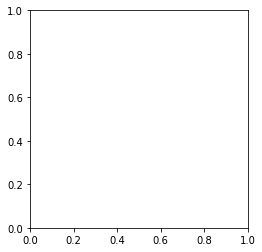

In [51]:
predictimg=cv2.imread("predictit.jpg",1)
predictimg=np.array(predictimg)
plt.imshow(predictimg)
predictimg=predictimg/255.0

predictimg = np.expand_dims(predictimg, axis=0)
predictimg.shape

In [52]:
predition=model.predict(predictimg)

predition=np.squeeze(predition)
print(predition)
predIndex=np.argmax(predition)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type NoneType).

In [53]:
print("The Species of given image is",species[predIndex])

NameError: name 'predIndex' is not defined